In [21]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm

from ipywidgets import interact
import ipywidgets as ipyw
from IPython.display import IFrame

In [22]:
az.style.use('arviz-darkgrid')

In [23]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [24]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "False",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/logo_inst.png" width="750">
<br>
<br>
<br>
<br>
<h1 align="center">Introduction to Bayesian Inference</h1>



<br>
<br>
<br>
<br>
<br>

## Aims

* Understand Bayes' Theorem
* Understand prior, posterior and posterior predictive distributions

## Bayesian modeling

<br>

* Statistics is a form of modeling


* A statistical model generates data


* A Bayesian model meets two requirements:
    1. Unknown quantities (parameters) are modeled using **probability distributions**
    2. The known quantities (data) are combined with the **prior distribution of parameters** using **Bayes theorem**

## Bayesian statistics

<br>

* Probability distributions allocate probabilities (credibilities) to a given set of values


* Bayesian statistics is reallocation of probability (credibility) across possibilities

## Bayes' Theorem

<br>

$$\underbrace{p(\theta \mid y)}_{posterior} = \frac{\overbrace{p(y \mid \theta)}^{\text{likelihood}} \overbrace{p(\theta)}^{prior}}{\underbrace{\color{red}{p(y)}}_{\text{marginal likelihood}}}$$
<br>

* $\theta$ represents the parameters in our model (what we want/need to learn)
* $y$ represents the data


* The central object for Bayesian statistics is the posterior distribution.


* $\color{red}{p(y) = \int_{\theta} p(y \mid \theta)p(\theta) d(\theta)}$ Generally no analytical solution or too costly --> Numerical methods to the rescue!

## Bayesian statistics in 3 steps (simplified workflow)

<br>

1. **Create a probabilistic model**. Probabilistic models are _stories_ about how the observed data is generated. The models are expressed using probability distributions.


2. **Condition the model to the observed data in order to obtain the posterior**. Using the Bayes theorem, the prior distribution is updated according to the observed data, obtaining the posterior distribution.


3. <font color = "gray"> **Criticize the fit of the generated model to the data and evaluate the consequences of the model**. </font>

## The M&M problem

* In 1995 the blue M&M’s was introduced.
* Before then, the color mix in a bag of plain M&M’s was 30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan.
* Afterward it was 24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown.
* A friend of mine has two bags of M&M’s, one from 1994 and one from 1996.
* He gives me one M&M from each bag. One is yellow and one is green.
* What is the probability that the yellow one came from the 1994 bag?

We have to discrete hypothesis

* A: Bag 1 is from 1994, which implies that Bag 2 is from 1996.
* B: Bag 1 is from 1996 and Bag 2 from 1994.
* Now we construct a table with a row for each hypothesis and a column for each term in Bayes theorem:


|  | p(θ)|p(y\|θ) | p(θ)p(y\|θ)| p(θ\|y) |
|---|-----|-------|-----------|--------|
| A | 0.5 | 20x20 |   200     |  20/27 |
| B | 0.5 | 14x10 |    70     |   7/27 | 

* 270 is the normalizing constant (marginal likelihood), we obtain it my summing over the  likelihood column

## The statistics of magical coins

<br>

* We are going to model tossing a coin
    * What is the probability of gastric cancer when taking low-dose of aspirin?
    * What is the probability that people will agree on legalizing medical abortion?



* Our parameter, $\theta$, can take values in the interval [0, 1]
    * $\theta = 1 \implies$ always get heads
    * $\theta = 0 \implies$ always get tails.


* According to Bayes' theorem we need to define a likelihood and a prior:


$$p(\theta \mid y) \propto \underbrace{p(y \mid \theta)}_{\text{?}} \underbrace{p(\theta)}_{?}$$


## The beta-binomial model

<br>
<br>
Mathematical representation
$$
\theta \sim \operatorname{Beta}(\alpha, \beta) \\
y \sim \operatorname{Bin}(n=1, p=\theta)
$$


<br>

Visual representation
<img src="img/modelo_1_moneda.png" width=300>

From top to bottom, we first have the prior, then the likelihood, and finally the data. The arrows indicate how the part of the model are related the symbol $\sim$ indicates the stochastic nature of the variables.

In [25]:
def beta(α, β):
    x = np.linspace(0, 1, 130)
    beta = stats.beta(α, β)
    plt.plot(x, beta.pdf(x))
    plt.yticks([])
    plt.ylim(0, 6)

interact(beta,
         α=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2),
         β=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2));

interactive(children=(FloatSlider(value=2.0, description='α', max=7.0, min=0.5, step=0.5), FloatSlider(value=2…

In [26]:
def binomial(n, θ):
    bino = stats.binom(
        n, θ)
    plt.bar(range(n+1), bino.pmf(range(n+1)))
    plt.xticks(range(n+1))
    plt.ylim(0, 1);

interact(binomial, n=ipyw.IntSlider(min=1, max=10, value=1), θ=ipyw.FloatSlider(min=0, max=1, step=0.05, value=0.5));

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), FloatSlider(value=0.5, description='…

### The posterior

It can be shown that whenever we use a beta distribution as prior and a binomial distribution as likelihood we will obtain a posterior that will be a beta distribution with the following parameters:


<br>

$$
p(\theta \mid y) \propto \operatorname{Beta}(\alpha=\alpha_{prior} + y , \quad \beta= \beta_{prior} + N - y)
$$

<br>

When it is fulfilled that for a certain likelihood the functional form of a prior and that of the a posterior is the same, it is said that the prior is conjugated with the _likelihood_.

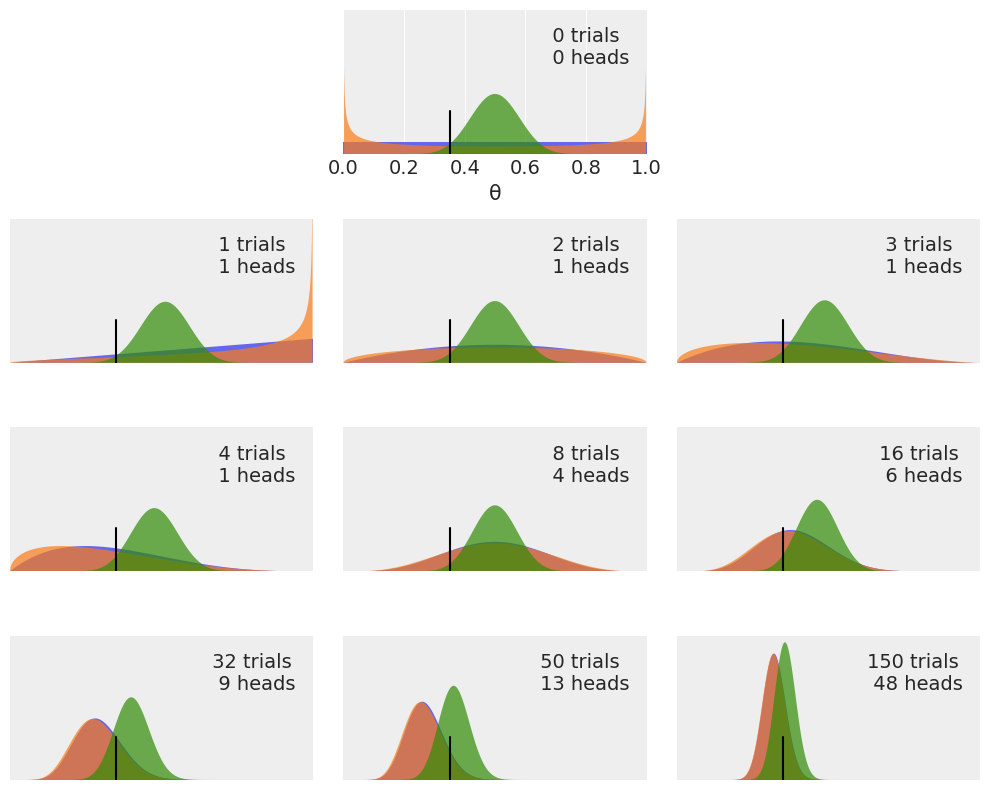

In [27]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 500)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

## Computing the posterior distribution

* There are many ways to compute a posterior
    * <font color=gray> Conjugacy </font>
    * Laplace Method
    * Grid method
    * <font color=gray> Integrated Laplace approximation (INLA)</font>
    * <font color=gray> Variational Inference (VI) </font>
    * Markov Chain Monte Carlo (MCMC)
    * ...


* Only MCMC methods (and to less extend VI) are general enough

## Laplace approximation

* Compute the Maximum a posteriori (the mode of the posterior). $\theta_{MAP}$

* Compute the Hessian Matrix $\mathcal{H}$

* Approximate the posterior as $\mathcal{N}\left(\theta_{MAP}, \mathcal{H}^{-0.5}\right)$

* Use the Hessian matrix to estimate the covariance of the Gaussian

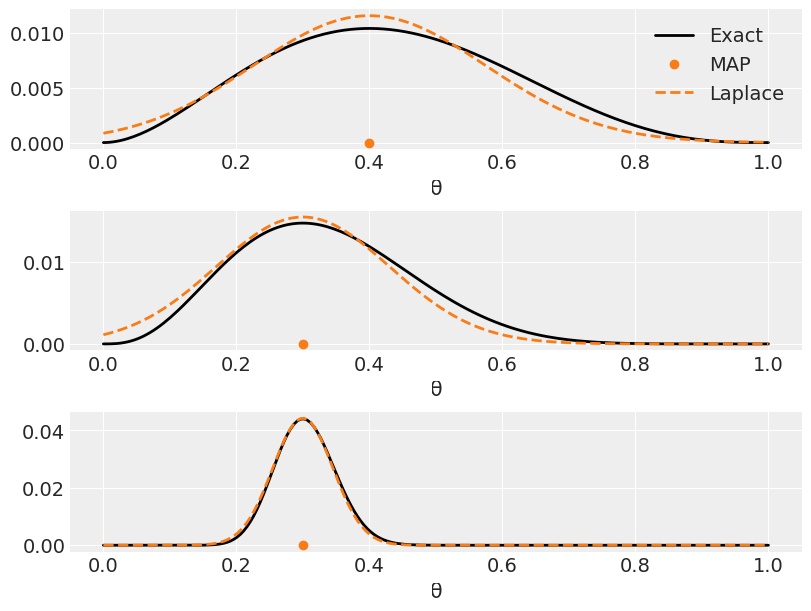

In [79]:
θ = np.linspace(0.0001, 0.9999, 200)
α = 1
β = 1

_, ax = plt.subplots(3, 1, constrained_layout=True, figsize=(8, 6))

for i, (N1, N) in enumerate([(2, 5), (3, 10), (30, 100)]):
    N0 = N - N1
    θ_MAP =  (α + N1-1) / (α + β + N-2)
    var =  ((α + N1) * (β + N0)) / ((α + N1 + β + N0)**2 * (α + N1 + β + N0 + 1))
    std = var**0.5

    post1 = stats.binom(N, θ).pmf(N1) * stats.beta(α, β).pdf(θ)
    post1 = post1 / np.sum(post1)
    post2 = stats.norm(θ_MAP, std).pdf(θ)
    post2 /= post2.sum()

    ax[i].plot(θ, post1, 'k', lw=2, label='Exact')
    ax[i].plot(θ_MAP, 0, 'oC1', label='MAP')
    ax[i].plot(θ, post2, 'C1--', lw=2, label='Laplace')
    ax[i].set_xlabel('θ')
ax[0].legend();

In [29]:
def posterior_grid(grid=10, α=1, β=1, heads=6, trials=9):
    grid = np.linspace(0, 1, grid)
    prior = stats.beta(α, β).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('heads = {}\ntrials = {}'.format(heads, trials))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['prior', 'likelihood', 'posterior'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(posterior_grid, grid=ipyw.IntSlider(min=2, max=100, step=1, value=15), α=ipyw.FloatSlider(min=1, max=7, step=1, value=1), β=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), heads=ipyw.IntSlider(min=0, max=20, step=1, value=6), trials=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grid', min=2), FloatSlider(value=1.0, description='α', …

## Markov Chain Monte Carlo (MCMC)

<br>

* MCMC methods can be used to **sample** from probability distributions that are difficult to sample directly


* If some mild conditions are satisfied, we get a theoretical guarantee that MCMC methods will _asymptotically_ converge to the correct stationary distribution. 


* Because we do not have guarantees for finite samples we need to diagnose the quality of the MCMC samples (we will discuss this later)

## The Metropolis-Hasting algorithm

1. Initialize the value of the parameter $x$ at $x_i$

2. Choose a new parameter value $x_{i + 1}$ , sampling from an easy-to-sample distribution such as a Gaussian distribution $q(x_{i + 1} \mid x_i)$. 

3. Compute the probability of accepting a new parameter value by using the Metropolis-Hastings criteria:

$$p_a (x_{i + 1} \mid x_i) = min \left (1, \frac{p(x_{i + 1}) q(x_i \mid x_{i + 1})} {p(x_i) q (x_{i + 1} \mid x_i} \right)$$

4. If $p_a \gt r$ where $r \sim \mathcal{U}(0, 1)$. Accept the new state, otherwise stay in the old state

5. Iterate from 2 until getting _enough_ samples


In [30]:
def log_post(θ, Y, α=1, β=1):
    """
    Compute log posterior distribution for the model:
    
    Beta(α, β) prior
    Y ~ Bern(θ) likelihood
    """
    prior = stats.beta(α, β).logpdf(θ)
    like  = stats.bernoulli(θ).logpmf(Y).sum()
    return like + prior

In [31]:
np.random.seed(820)
data = stats.bernoulli(0.1).rvs(50)

In [32]:
# This is pedagogical example and not production code
# computation are in log scale for numerical stability
n_iters = 1000
proposal_sd = 0.1  # Try different values of can_sd to see the effect on the acceptance rate

# initial values
θ = 0
results = np.zeros(n_iters)
# precompute values for later use
Δ = stats.norm(0, proposal_sd).rvs(n_iters)
rnd = np.log(stats.uniform().rvs(n_iters))

for iter in range(n_iters):
    # Draw a candidate by perturbing current state
    candidate = θ + Δ[iter]
    new_p = log_post(candidate, data)
    old_p = log_post(θ, data)
    R = new_p - old_p
    # acceptance criterion
    if R > rnd[iter]:
        θ = candidate

    results[iter] = θ

samples = {'θ': results[10:]}

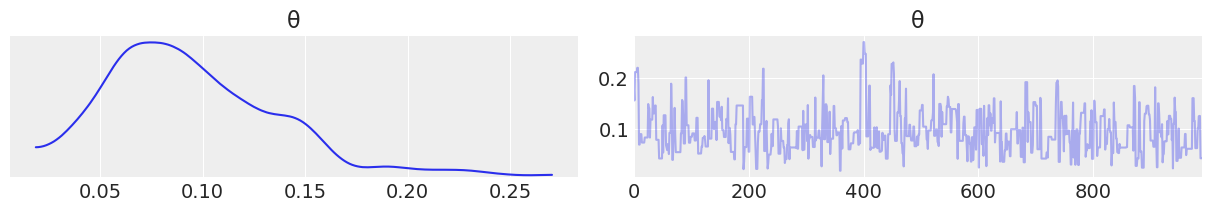

In [33]:
az.plot_trace(samples);  # This is arviz a library for explotarory analysis of Bayesian models

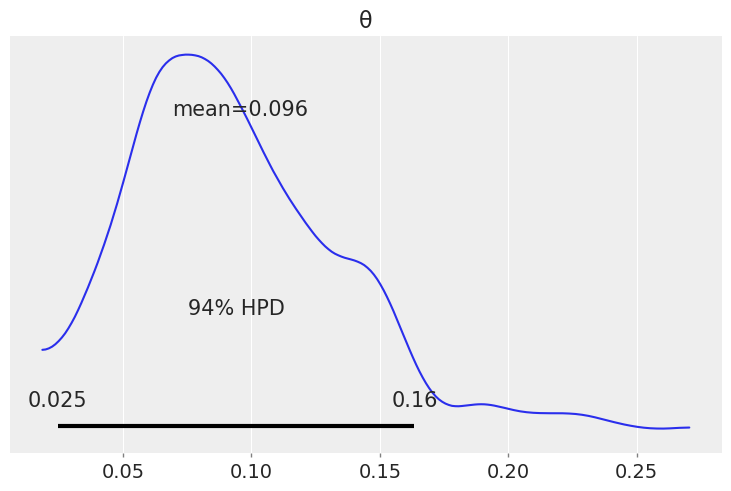

In [34]:
az.plot_posterior(samples);

In [35]:
az.summary(samples)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 990), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.096,0.042,0.025,0.163,0.003,0.002,218.0,187.0,250.0,167.0,NaN


### The Efficiency of MH

* In practice MH has to be tuned for particular problems
* The proposal distribution is extremely import to get a useful implementation of the algorithm
* This can be done automatically (adaptative MH)
* The covariance matrix of the proposal distribution is _tuned_ to reach a target acceptance ratio of 0.234 (or _close_ to it)

## Hamiltonian Monte Carlo (HMC) and NUTS

* HMC is an extension of MH where the proposal distribution comes from Hamiltonian evolution of a _particle following the potential energy (posterior distribution) and the momentum (auxiliary variable).
* Compared to MH the efficiency is significantly increased because the correlation between successive samples is reduced 
* This is a direct consequence of the ability of the method to propose new states with high acceptance rate even when they are distant in the parameter space. 
* The efficiency of the HMC heavily depends on certain hyperparameters
* NUTS is a HMC method that automatically computes such hyperparameters

[HMC from scratch](https://colindcarroll.com/2019/04/11/hamiltonian-monte-carlo-from-scratch/)

Si quieren puedo incluir código para el computo de un HMC, pero me parece que explicar el método (para que se entienda el código) 
puede llevar mucho tiempo. Si nos queremos quedar con lo intuitivo, creo que bastaría con jugar un poco con el ejemplo a continaución, donde se pueden ver comp funcionan varios samplers para varias distribuciones.

In [36]:
IFrame(src='mcmc-demo-master/app.html#RandomWalkMH,standard', width=1200, height=600)

# Probabilistic programming


* Although conceptually simple, fully probabilistic models often lead to analytically intractable expressions

* The _promise of probabilistic programming_  is clear separation of modeling and inference. Practitioners should focus on modeling, not _computational/mathematical details_

* Models are written in code and then _compiled_ to get the posterior

* _Universal inference engines_ can solve any probabilistic model (over-statement!)

## PyMC3: Probabilistic programming with Python
<br>

<center><img src="img/PyMC3_banner.svg" width=300></center>

* Model building
    * A large collections of probability distributions
    * A clear and powerful syntax
    * Integration with the PyData-stack


* Inference
    * Markov Chain Monte Carlo (NUTS, MH)
    * Sequential Monte Carlo (SMC, SMC-ABC)
    * Variational Inference


* Computational backend:
    * Theano --> Speed, automatic differenciation, mathematical optimizations, GPU Support
    * PyMC4 --> [Tensorflow Probability](https://medium.com/@pymc_devs/theano-tensorflow-and-the-future-of-pymc-6c9987bb19d5)

In [37]:
np.random.seed(123)
n_experimentos = 4
theta_real = .35  # In real examples this value is unknown
datos = stats.bernoulli.rvs(theta_real, size=n_experimentos)
datos

array([1, 0, 0, 0])

In [38]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1, beta=1)  # a priori
    y = pm.Bernoulli('y', p=θ, observed=datos)  # likelihood
    trace = pm.sample(1000)  # Universal Inferece engine!

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 2701.14draws/s]


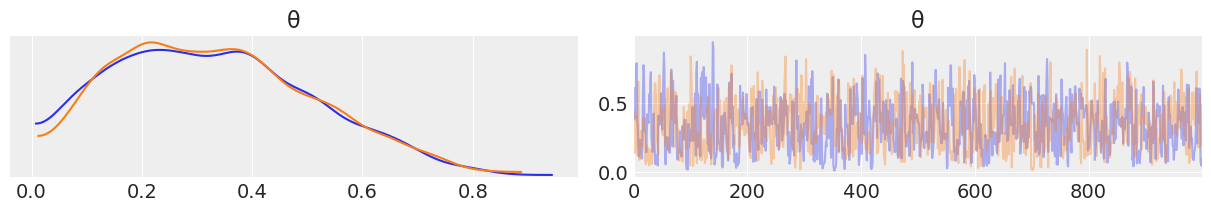

In [40]:
az.plot_trace(trace);

In [ ]:
## Loss functions

(0.3373423297141785, 0.32283169397024636)

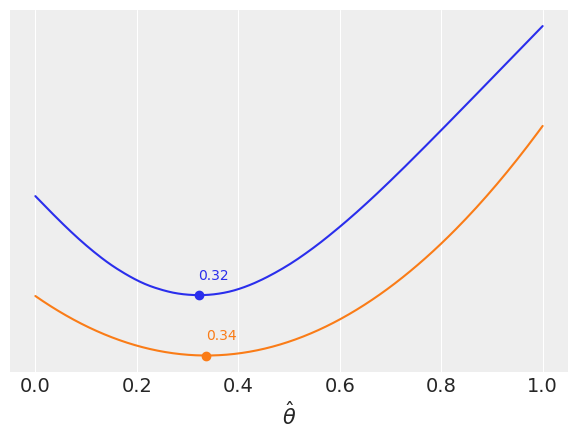

In [41]:
grid = np.linspace(0, 1, 200)
θ_pos = trace['θ']
lossf_a = [np.mean(abs(i - θ_pos)) for i in grid]
lossf_b = [np.mean((i - θ_pos)**2) for i in grid]

for lossf, c in zip([lossf_a, lossf_b], ['C0', 'C1']):
    mini = np.argmin(lossf)
    plt.plot(grid, lossf, c)
    plt.plot(grid[mini], lossf[mini], 'o', color=c)
    plt.annotate('{:.2f}'.format(grid[mini]),
                 (grid[mini], lossf[mini] + 0.03), color=c)
    plt.yticks([])
    plt.xlabel(r'$\hat \theta$')
    
np.mean(θ_pos), np.median(θ_pos)

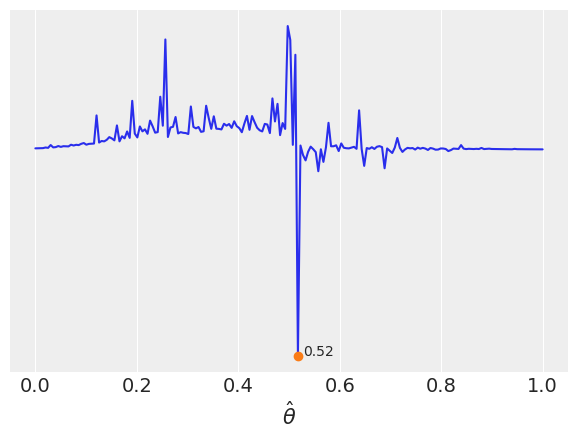

In [43]:
# weird loss function
lossf = []
for i in grid:
    if i < 0.5:
        f = np.mean(np.pi * θ_pos / np.abs(i - θ_pos))
    else:
        f = np.mean(1 / (i - θ_pos))
    lossf.append(f)

mini = np.argmin(lossf)
plt.plot(grid, lossf)
plt.plot(grid[mini], lossf[mini], 'o')
plt.annotate('{:.2f}'.format(grid[mini]),
             (grid[mini] + 0.01, lossf[mini] + 0.1))
plt.yticks([])
plt.xlabel(r'$\hat \theta$');

## Bayesian statistics in a nutshell

* Models produce data
* Models has unknown parameters
* We associate prior probability distributions to parameters
* Bayes' theorem allow us to combine data and the prior distribution
* The posterior is the joint distribution of parameters after seen the data
* Hopefully the posterior distribution will have less uncertainty than the prior distribution

# Exercises


1. Starting from the definition of conditional probability $p(A \mid B) = \frac{p(A, B)}{p(B)}$ obtain Bayes' theorem

2. 

3. Use the following interactive widget to explore different combinations of priors and likelihoods. Summarize the observations that you consider most relevant.